In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Ridge
import seaborn as sns
sns.set()
import joblib
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform,randint
from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
import pickle
import sklearn.preprocessing as preproc 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [53]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [54]:
df = pd.read_csv('EDA_dataset.csv')

In [43]:
print(df.columns)

Index(['Country_Name', 'Year', 'Access_to_electricity_(%_of_population)',
       'Adjusted_net_enrollment_rate,_primary_(%_of_primary_school_age_children)',
       'Adjusted_net_national_income_(constant_2015_US$)',
       'Adjusted_net_national_income_per_capita_(annual_%_growth)',
       'Adjusted_net_national_income_per_capita_(constant_2015_US$)',
       'Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_bottom_40%_of_population_(%)',
       'Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_total_population_(%)',
       'CPIA_social_protection_rating_(1=low_to_6=high)',
       ...
       'Taxes_on_international_trade_(current_LCU)', 'Trade_(%_of_GDP)',
       'Trade_in_services_(%_of_GDP)',
       'Unemployment,_total_(%_of_total_labor_force)_(modeled_ILO_estimate)',
       'Unemployment,_youth_total_(%_of_total_labor_force_ages_15-24)_(modeled_ILO_estimate)',
       'Urban_population', 'Urban_population_(%_of_t

In [44]:
#One hot encoding 

import pandas as pd

# Read the CSV file into a pandas dataframe
df = pd.read_csv('EDA_dataset.csv')

# Select the categorical column to one-hot encode
cat_col = 'Country_Name'

# Perform one-hot encoding on the selected column using get_dummies()
one_hot_encoded = pd.get_dummies(df[cat_col], prefix=cat_col)

# Add the one-hot encoded columns to the original dataframe
df = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original categorical column
df.drop(cat_col, axis=1, inplace=True)

# Print the encoded dataframe
print(df.head())

   Year  Access_to_electricity_(%_of_population)  \
0  1999                             2.359690e+11   
1  2000                             1.995793e+01   
2  2001                             1.998622e+01   
3  2002                             2.160150e+01   
4  2003                             2.254831e+01   

   Adjusted_net_enrollment_rate,_primary_(%_of_primary_school_age_children)  \
0                                       2.359690e+11                          
1                                       2.270450e+11                          
2                                       2.460002e+11                          
3                                       2.489774e+11                          
4                                       2.652209e+11                          

   Adjusted_net_national_income_(constant_2015_US$)  \
0                                      2.359690e+11   
1                                      2.270450e+11   
2                                      2.460002

In [45]:
df.to_csv('ANN_df.csv', index=False)

In [55]:
# Load the data into a pandas dataframe
data = pd.read_csv('ANN_df.csv')

# Print the list of column names
print(data.columns)

Index(['Year', 'Access_to_electricity_(%_of_population)',
       'Adjusted_net_enrollment_rate,_primary_(%_of_primary_school_age_children)',
       'Adjusted_net_national_income_(constant_2015_US$)',
       'Adjusted_net_national_income_per_capita_(annual_%_growth)',
       'Adjusted_net_national_income_per_capita_(constant_2015_US$)',
       'Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_bottom_40%_of_population_(%)',
       'Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_total_population_(%)',
       'CPIA_social_protection_rating_(1=low_to_6=high)',
       'CPIA_trade_rating_(1=low_to_6=high)',
       ...
       'Country_Name_Sub-Saharan Africa',
       'Country_Name_Sub-Saharan Africa (IDA & IBRD countries)',
       'Country_Name_Sub-Saharan Africa (excluding high income)',
       'Country_Name_Sudan', 'Country_Name_Tanzania', 'Country_Name_Togo',
       'Country_Name_Uganda', 'Country_Name_World', 'Countr

In [92]:
#ANN Test 1 - 90% Training / 10% Test Split

# Load data from CSV file
data = pd.read_csv('ANN_df.csv')

# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

# Separate features and target variable in training set
x_train = train_data.drop('GDP_per_capita_(constant_2015_US$)', axis=1)
y_train = train_data['GDP_per_capita_(constant_2015_US$)']


# Separate features and target variable in testing set
x_test = test_data.drop('GDP_per_capita_(constant_2015_US$)', axis=1)
y_test = test_data['GDP_per_capita_(constant_2015_US$)']

In [99]:
data.head()

,Year,Access_to_electricity_(%_of_population),"Adjusted_net_enrollment_rate,_primary_(%_of_primary_school_age_children)",Adjusted_net_national_income_(constant_2015_US$),Adjusted_net_national_income_per_capita_(annual_%_growth),Adjusted_net_national_income_per_capita_(constant_2015_US$),"Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_bottom_40%_of_population_(%)","Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_total_population_(%)",CPIA_social_protection_rating_(1=low_to_6=high),CPIA_trade_rating_(1=low_to_6=high),"Central_government_debt,_total_(%_of_GDP)","Children_out_of_school,_primary",Current_account_balance_(%_of_GDP),Current_health_expenditure_(%_of_GDP),"Current_health_expenditure_per_capita,_PPP_(current_international_$)","Employment_to_population_ratio,_15+,_total_(%)_(modeled_ILO_estimate)",Exports_of_goods_and_services_(%_of_GDP),Exports_of_goods_and_services_(annual_%_growth),Final_consumption_expenditure_(%_of_GDP),Final_consumption_expenditure_(annual_%_growth),"Foreign_direct_investment,_net_inflows_(%_of_GDP)","Foreign_direct_investment,_net_outflows_(%_of_GDP)",GDP_(constant_2015_US$),GDP_(constant_LCU),GDP_growth_(annual_%),GDP_per_capita_(constant_2015_US$),GDP_per_capita_(constant_LCU),GDP_per_capita_growth_(annual_%),"GDP_per_capita,_PPP_(constant_2017_international_$)",GDP_per_person_employed_(constant_2017_PPP_$),"GDP,_PPP_(constant_2017_international_$)",Gini_index,"Government_expenditure_on_education,_total_(%_of_GDP)","Government_expenditure_on_education,_total_(%_of_government_expenditure)",Gross_domestic_income_(constant_LCU),Gross_domestic_savings_(%_of_GDP),Gross_national_expenditure_(constant_2015_US$),Gross_savings_(%_of_GDP),"Hospital_beds_(per_1,000_people)",Human_capital_index_(HCI)_(scale_0-1),"Human_capital_index_(HCI),_lower_bound_(scale_0-1)","Human_capital_index_(HCI),_upper_bound_(scale_0-1)",Income_share_held_by_highest_10%,Income_share_held_by_highest_20%,Income_share_held_by_lowest_10%,Income_share_held_by_lowest_20%,Increase_in_poverty_gap_at_$1.90_($_2011_PPP)_poverty_line_due_to_out-of-pocket_health_care_expenditure_(%_of_poverty_line),Increase_in_poverty_gap_at_$1.90_($_2011_PPP)_poverty_line_due_to_out-of-pocket_health_care_expenditure_(USD),Increase_in_poverty_gap_at_$3.20_($_2011_PPP)_poverty_line_due_to_out-of-pocket_health_care_expenditure_(%_of_poverty_line),Increase_in_poverty_gap_at_$3.20_($_2011_PPP)_poverty_line_due_to_out-of-pocket_health_care_expenditure_(USD),"Inflation,_GDP_deflator_(annual_%)","Inflation,_GDP_deflator:_linked_series_(annual_%)","Inflation,_consumer_prices_(annual_%)","Labor_force,_total","Life_expectancy_at_birth,_total_(years)","Literacy_rate,_adult_total_(%_of_people_ages_15_and_above)","Literacy_rate,_youth_total_(%_of_people_ages_15-24)","Mortality_rate,_infant_(per_1,000_live_births)","Mortality_rate,_under-5_(per_1,000_live_births)",Net_acquisition_of_financial_assets_(current_LCU),Net_barter_terms_of_trade_index_(2000_=_100),"Net_financial_flows,_bilateral_(NFL,_current_US$)",Net_foreign_assets_(current_LCU),Net_investment_in_nonfinancial_assets_(current_LCU),Net_lending_(+)_/_net_borrowing_(-)_(current_LCU),"Net_trade_in_goods_(BoP,_current_US$)",Number_of_under-five_deaths,Ores_and_metals_exports_(%_of_merchandise_exports),"Population,_total",Poverty_gap_at_$2.15_a_day_(2017_PPP)_(%),Poverty_gap_at_$3.65_a_day_(2017_PPP)_(%),Poverty_gap_at_$6.85_a_day_(2017_PPP)_(%),Poverty_headcount_ratio_at_$2.15_a_day_(2017_PPP)_(%_of_population),Poverty_headcount_ratio_at_$3.65_a_day_(2017_PPP)_(%_of_population),Poverty_headcount_ratio_at_$6.85_a_day_(2017_PPP)_(%_of_population),Poverty_headcount_ratio_at_national_poverty_lines_(%_of_population),Present_value_of_external_debt_(current_US$),Price_level_ratio_of_PPP_conversion_factor_(GDP)_to_market_exchange_rate,"Primary_completion_rate,_total_(%_of_relevant_age_group)",Public_private_partnerships_investment_in_ICT_(current_US

In [93]:
# Pre-processing of data set by scaling with Standard Scaler

def scale_datasets(x_train, x_test):

  
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [94]:
# Adding Hyper-parameters to neural model

hidden_units1 = 40
hidden_units2 = 80
hidden_units3 = 120
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [95]:
# ANN Test 1 - MSLE Score 

# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.1
)

Epoch 1/10
15/15 [==============================] - 1s 9ms/step - loss: 45.5049 - mean_squared_logarithmic_error: 45.0519 - val_loss: 12.2830 - val_mean_squared_logarithmic_error: 12.0960
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 17.8215 - mean_squared_logarithmic_error: 17.9776 - val_loss: 9.9291 - val_mean_squared_logarithmic_error: 9.7273
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 16.2189 - mean_squared_logarithmic_error: 16.3761 - val_loss: 9.5353 - val_mean_squared_logarithmic_error: 9.3279
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 15.3995 - mean_squared_logarithmic_error: 15.4491 - val_loss: 8.9057 - val_mean_squared_logarithmic_error: 8.6975
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 14.4682 - mean_squared_logarithmic_error: 14.6085 - val_loss: 8.3497 - val_mean_squared_logarithmic_error: 8.1358
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - lo

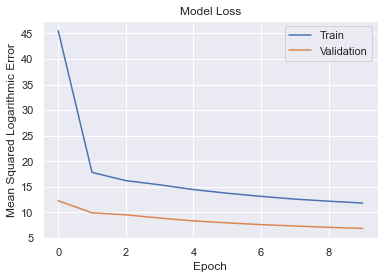

In [96]:
# plot training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Mean Squared Logarithmic Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [97]:
x_test['prediction'] = model.predict(x_test_scaled)

4/4 [==============================] - 0s 1ms/step


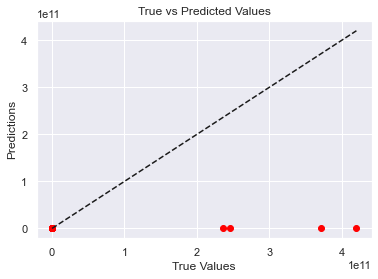

In [98]:
# Create a scatter plot of true vs predicted values
plt.scatter(y_test, x_test['prediction'], color='red')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

In [60]:
# ANN Test 1 - R2 Score 

from sklearn.metrics import r2_score

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Make predictions for the test set
y_pred = model.predict(x_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 score: {:.2f}".format(r2))

Epoch 1/10
15/15 [==============================] - 0s 11ms/step - loss: 263.4421 - mean_squared_logarithmic_error: 259.2306 - val_loss: 19.1420 - val_mean_squared_logarithmic_error: 19.5825
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 31.6449 - mean_squared_logarithmic_error: 31.4918 - val_loss: 17.6690 - val_mean_squared_logarithmic_error: 17.3237
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 25.4551 - mean_squared_logarithmic_error: 25.2185 - val_loss: 14.3688 - val_mean_squared_logarithmic_error: 14.0415
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 22.9745 - mean_squared_logarithmic_error: 23.0762 - val_loss: 13.0097 - val_mean_squared_logarithmic_error: 12.6938
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 21.5937 - mean_squared_logarithmic_error: 21.5312 - val_loss: 12.3746 - val_mean_squared_logarithmic_error: 12.0664
Epoch 6/10
15/15 [==============================] - 0s 3m

In [61]:
# ANN Test 1 - RMSE Score 

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Make predictions for the test set
y_pred = model.predict(x_test)


# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: {:.2f}".format(rmse))

Epoch 1/10
15/15 [==============================] - 0s 7ms/step - loss: 19.7713 - mean_squared_logarithmic_error: 19.5849 - val_loss: 11.4138 - val_mean_squared_logarithmic_error: 11.1283
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 19.6300 - mean_squared_logarithmic_error: 19.5875 - val_loss: 11.3800 - val_mean_squared_logarithmic_error: 11.0966
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 19.5115 - mean_squared_logarithmic_error: 19.5781 - val_loss: 11.3569 - val_mean_squared_logarithmic_error: 11.0753
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 19.4781 - mean_squared_logarithmic_error: 19.5276 - val_loss: 11.3416 - val_mean_squared_logarithmic_error: 11.0618
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 19.5481 - mean_squared_logarithmic_error: 19.4920 - val_loss: 11.3311 - val_mean_squared_logarithmic_error: 11.0530
Epoch 6/10
15/15 [==============================] - 0s 3ms/s

In [62]:
#MAE Score


from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Make predictions for the test set
y_pred = model.predict(x_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE: {:.2f}".format(mae))




Epoch 1/10
15/15 [==============================] - 0s 7ms/step - loss: 19.3429 - mean_squared_logarithmic_error: 19.1742 - val_loss: 11.3323 - val_mean_squared_logarithmic_error: 11.0619
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 19.3214 - mean_squared_logarithmic_error: 19.2720 - val_loss: 11.3366 - val_mean_squared_logarithmic_error: 11.0671
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 19.3192 - mean_squared_logarithmic_error: 19.4214 - val_loss: 11.3413 - val_mean_squared_logarithmic_error: 11.0727
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 19.2063 - mean_squared_logarithmic_error: 19.4059 - val_loss: 11.3476 - val_mean_squared_logarithmic_error: 11.0799
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 19.2027 - mean_squared_logarithmic_error: 19.0435 - val_loss: 11.3531 - val_mean_squared_logarithmic_error: 11.0862
Epoch 6/10
15/15 [==============================] - 0s 3ms/s

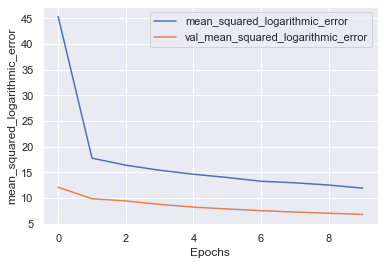

In [34]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

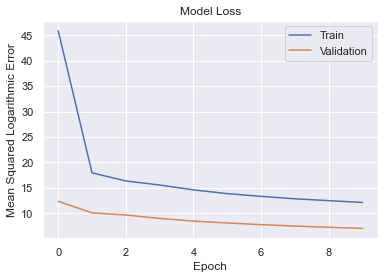

In [35]:
import matplotlib.pyplot as plt

# plot training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Mean Squared Logarithmic Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [37]:
x_test['prediction'] = model.predict(x_test_scaled)

4/4 [==============================] - 0s 1ms/step


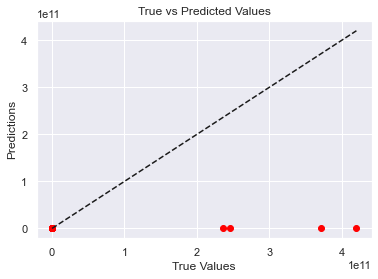

In [38]:
# Create a scatter plot of true vs predicted values
plt.scatter(y_test, x_test['prediction'], color='red')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()


In [63]:
#ANN Test 1 - 80% Training / 20% Test Split

# Load data from CSV file
data = pd.read_csv('ANN_df.csv')

# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Separate features and target variable in training set
x_train = train_data.drop('GDP_per_capita_(constant_2015_US$)', axis=1)
y_train = train_data['GDP_per_capita_(constant_2015_US$)']


# Separate features and target variable in testing set
x_test = test_data.drop('GDP_per_capita_(constant_2015_US$)', axis=1)
y_test = test_data['GDP_per_capita_(constant_2015_US$)']

In [64]:
# Pre-processing of data set by scaling with Standard Scaler

def scale_datasets(x_train, x_test):

  
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [65]:
# Adding Hyper-parameters to neural model

hidden_units1 = 40
hidden_units2 = 80
hidden_units3 = 120
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [66]:
# ANN Test 1 - MSLE Score 

# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
12/12 [==============================] - 1s 11ms/step - loss: 53.5997 - mean_squared_logarithmic_error: 52.4409 - val_loss: 16.0756 - val_mean_squared_logarithmic_error: 15.9425
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 20.3524 - mean_squared_logarithmic_error: 20.0102 - val_loss: 11.6548 - val_mean_squared_logarithmic_error: 11.5276
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 17.6480 - mean_squared_logarithmic_error: 17.4001 - val_loss: 11.3679 - val_mean_squared_logarithmic_error: 11.2453
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 16.8362 - mean_squared_logarithmic_error: 17.0107 - val_loss: 10.9461 - val_mean_squared_logarithmic_error: 10.8291
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 16.1966 - mean_squared_logarithmic_error: 16.3668 - val_loss: 10.2963 - val_mean_squared_logarithmic_error: 10.1858
Epoch 6/10
12/12 [==============================] - 0s 3ms/

In [68]:
# ANN Test 1 - R2 Score 

from sklearn.metrics import r2_score

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Make predictions for the test set
y_pred = model.predict(x_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 score: {:.2f}".format(r2))



# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE: {:.2f}".format(mae))



# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: {:.2f}".format(rmse))

Epoch 1/10
12/12 [==============================] - 0s 9ms/step - loss: 20.8655 - mean_squared_logarithmic_error: 21.3515 - val_loss: 12.8675 - val_mean_squared_logarithmic_error: 12.7243
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 20.7317 - mean_squared_logarithmic_error: 20.4233 - val_loss: 12.7834 - val_mean_squared_logarithmic_error: 12.6405
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 20.6027 - mean_squared_logarithmic_error: 20.0174 - val_loss: 12.7163 - val_mean_squared_logarithmic_error: 12.5738
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 20.4452 - mean_squared_logarithmic_error: 21.5020 - val_loss: 12.6707 - val_mean_squared_logarithmic_error: 12.5285
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 20.3607 - mean_squared_logarithmic_error: 19.7761 - val_loss: 12.6285 - val_mean_squared_logarithmic_error: 12.4866
Epoch 6/10
12/12 [==============================] - 0s 3ms/s

In [ ]:
#ANN Test 1 - 70% Training / 30% Test Split

# Load data from CSV file
data = pd.read_csv('ANN_df.csv')

# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# Separate features and target variable in training set
x_train = train_data.drop('GDP_per_capita_(constant_2015_US$)', axis=1)
y_train = train_data['GDP_per_capita_(constant_2015_US$)']


# Separate features and target variable in testing set
x_test = test_data.drop('GDP_per_capita_(constant_2015_US$)', axis=1)
y_test = test_data['GDP_per_capita_(constant_2015_US$)']

# Pre-processing of data set by scaling with Standard Scaler

def scale_datasets(x_train, x_test):

  
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

# Adding Hyper-parameters to neural model

hidden_units1 = 40
hidden_units2 = 80
hidden_units3 = 120
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [69]:
# ANN Test 1 - MSLE Score 

# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.3
)

# Make predictions for the test set
y_pred = model.predict(x_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 score: {:.2f}".format(r2))



# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE: {:.2f}".format(mae))



# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: {:.2f}".format(rmse))


Epoch 1/10
11/11 [==============================] - 1s 12ms/step - loss: 14.9404 - mean_squared_logarithmic_error: 15.3893 - val_loss: 9.8988 - val_mean_squared_logarithmic_error: 8.7392
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 12.8343 - mean_squared_logarithmic_error: 13.3444 - val_loss: 9.0950 - val_mean_squared_logarithmic_error: 8.0205
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 11.7205 - mean_squared_logarithmic_error: 10.9944 - val_loss: 8.4281 - val_mean_squared_logarithmic_error: 7.4244
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 11.0226 - mean_squared_logarithmic_error: 10.4892 - val_loss: 7.9784 - val_mean_squared_logarithmic_error: 7.0406
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 10.5341 - mean_squared_logarithmic_error: 9.8352 - val_loss: 7.6325 - val_mean_squared_logarithmic_error: 6.7322
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss

In [77]:
#ANN Tests using the Robust Scaler - 10% Testing Size
from sklearn.preprocessing import RobustScaler


# Load data from CSV file
data = pd.read_csv('ANN_df.csv')

# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

# Separate features and target variable in training set
x_train = train_data.drop('GDP_per_capita_(constant_2015_US$)', axis=1)
y_train = train_data['GDP_per_capita_(constant_2015_US$)']


# Separate features and target variable in testing set
x_test = test_data.drop('GDP_per_capita_(constant_2015_US$)', axis=1)
y_test = test_data['GDP_per_capita_(constant_2015_US$)']

In [78]:
# Pre-processing of data set by scaling with Robust Scaler



def scale_datasets(x_train, x_test):
    scaler = RobustScaler()
    x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
    x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
    return x_train_scaled, x_test_scaled

x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [79]:
# Adding Hyper-parameters to neural model

hidden_units1 = 150
hidden_units2 = 300
hidden_units3 = 450
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [80]:
# ANN Test 1 - MSLE Score 

# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.1
)

# Make predictions for the test set
y_pred = model.predict(x_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 score: {:.2f}".format(r2))



# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE: {:.2f}".format(mae))



# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: {:.2f}".format(rmse))

Epoch 1/10
15/15 [==============================] - 1s 11ms/step - loss: 85.5997 - mean_squared_logarithmic_error: 85.6814 - val_loss: 71.2352 - val_mean_squared_logarithmic_error: 70.8439
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 84.8299 - mean_squared_logarithmic_error: 85.1785 - val_loss: 71.2352 - val_mean_squared_logarithmic_error: 70.8439
Epoch 3/10
15/15 [==============================] - 0s 4ms/step - loss: 84.8299 - mean_squared_logarithmic_error: 84.9663 - val_loss: 71.2352 - val_mean_squared_logarithmic_error: 70.8439
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 84.8299 - mean_squared_logarithmic_error: 84.9131 - val_loss: 71.2352 - val_mean_squared_logarithmic_error: 70.8439
Epoch 5/10
15/15 [==============================] - 0s 4ms/step - loss: 84.8299 - mean_squared_logarithmic_error: 84.7210 - val_loss: 71.2352 - val_mean_squared_logarithmic_error: 70.8439
Epoch 6/10
15/15 [==============================] - 0s 5ms/

In [82]:
#ANN Tests using the Robust Scaler - 20% Testing Size
from sklearn.preprocessing import RobustScaler


# Load data from CSV file
data = pd.read_csv('ANN_df.csv')

# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Separate features and target variable in training set
x_train = train_data.drop('GDP_per_capita_(constant_2015_US$)', axis=1)
y_train = train_data['GDP_per_capita_(constant_2015_US$)']


# Separate features and target variable in testing set
x_test = test_data.drop('GDP_per_capita_(constant_2015_US$)', axis=1)
y_test = test_data['GDP_per_capita_(constant_2015_US$)']


# Pre-processing of data set by scaling with Robust Scaler


def scale_datasets(x_train, x_test):
    scaler = RobustScaler()
    x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
    x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
    return x_train_scaled, x_test_scaled

x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)


# Adding Hyper-parameters to neural model

hidden_units1 = 150
hidden_units2 = 300
hidden_units3 = 450
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()


# ANN Test 1 - MSLE Score 

# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=100,
    validation_split=0.2
)

# Make predictions for the test set
y_pred = model.predict(x_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 score: {:.2f}".format(r2))


# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE: {:.2f}".format(mae))


# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: {:.2f}".format(rmse))

Epoch 1/10
8/8 [==============================] - 1s 19ms/step - loss: 87.0683 - mean_squared_logarithmic_error: 84.8726 - val_loss: 72.3138 - val_mean_squared_logarithmic_error: 72.0482
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 86.7278 - mean_squared_logarithmic_error: 86.3032 - val_loss: 72.3138 - val_mean_squared_logarithmic_error: 72.0482
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 86.7278 - mean_squared_logarithmic_error: 87.6688 - val_loss: 72.3138 - val_mean_squared_logarithmic_error: 72.0482
Epoch 4/10
8/8 [==============================] - 0s 7ms/step - loss: 86.7278 - mean_squared_logarithmic_error: 86.3900 - val_loss: 72.3138 - val_mean_squared_logarithmic_error: 72.0482
Epoch 5/10
8/8 [==============================] - 0s 7ms/step - loss: 86.7278 - mean_squared_logarithmic_error: 87.3599 - val_loss: 72.3138 - val_mean_squared_logarithmic_error: 72.0482
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss:

In [83]:
#ANN Tests using the Robust Scaler - 30% Testing Size
from sklearn.preprocessing import RobustScaler


# Load data from CSV file
data = pd.read_csv('ANN_df.csv')

# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# Separate features and target variable in training set
x_train = train_data.drop('GDP_per_capita_(constant_2015_US$)', axis=1)
y_train = train_data['GDP_per_capita_(constant_2015_US$)']


# Separate features and target variable in testing set
x_test = test_data.drop('GDP_per_capita_(constant_2015_US$)', axis=1)
y_test = test_data['GDP_per_capita_(constant_2015_US$)']


# Pre-processing of data set by scaling with Robust Scaler


def scale_datasets(x_train, x_test):
    scaler = RobustScaler()
    x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
    x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
    return x_train_scaled, x_test_scaled

x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)


# Adding Hyper-parameters to neural model

hidden_units1 = 150
hidden_units2 = 300
hidden_units3 = 450
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()


# ANN Test 1 - MSLE Score 

# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=100,
    validation_split=0.3
)

# Make predictions for the test set
y_pred = model.predict(x_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 score: {:.2f}".format(r2))


# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE: {:.2f}".format(mae))


# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: {:.2f}".format(rmse))

Epoch 1/10
6/6 [==============================] - 1s 25ms/step - loss: 94.3099 - mean_squared_logarithmic_error: 94.0087 - val_loss: 77.3548 - val_mean_squared_logarithmic_error: 75.7072
Epoch 2/10
6/6 [==============================] - 0s 8ms/step - loss: 87.3762 - mean_squared_logarithmic_error: 87.8917 - val_loss: 77.3548 - val_mean_squared_logarithmic_error: 75.7072
Epoch 3/10
6/6 [==============================] - 0s 8ms/step - loss: 87.3762 - mean_squared_logarithmic_error: 86.7131 - val_loss: 77.3548 - val_mean_squared_logarithmic_error: 75.7072
Epoch 4/10
6/6 [==============================] - 0s 8ms/step - loss: 87.3762 - mean_squared_logarithmic_error: 87.1223 - val_loss: 77.3548 - val_mean_squared_logarithmic_error: 75.7072
Epoch 5/10
6/6 [==============================] - 0s 8ms/step - loss: 87.3762 - mean_squared_logarithmic_error: 88.7208 - val_loss: 77.3548 - val_mean_squared_logarithmic_error: 75.7072
Epoch 6/10
6/6 [==============================] - 0s 8ms/step - loss:

In [84]:
#ANN Tests using the MinMax Scaler - 10% Testing Size
from sklearn.preprocessing import MinMaxScaler


# Load data from CSV file
data = pd.read_csv('ANN_df.csv')

# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

# Separate features and target variable in training set
x_train = train_data.drop('GDP_per_capita_(constant_2015_US$)', axis=1)
y_train = train_data['GDP_per_capita_(constant_2015_US$)']


# Separate features and target variable in testing set
x_test = test_data.drop('GDP_per_capita_(constant_2015_US$)', axis=1)
y_test = test_data['GDP_per_capita_(constant_2015_US$)']


# Pre-processing of data set by scaling with Min/Max Scaler


def scale_datasets(x_train, x_test):
  
  minmax_scaler = MinMaxScaler()
  x_train_scaled = pd.DataFrame(
      minmax_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      minmax_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled

x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)


# Adding Hyper-parameters to neural model

hidden_units1 = 150
hidden_units2 = 300
hidden_units3 = 450
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()


# ANN Test 1 - MSLE Score 

# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=100,
    validation_split=0.1
)

# Make predictions for the test set
y_pred = model.predict(x_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 score: {:.2f}".format(r2))


# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE: {:.2f}".format(mae))


# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: {:.2f}".format(rmse))

Epoch 1/10
10/10 [==============================] - 1s 15ms/step - loss: 33.9760 - mean_squared_logarithmic_error: 33.0164 - val_loss: 11.4851 - val_mean_squared_logarithmic_error: 7.4166
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 18.7953 - mean_squared_logarithmic_error: 18.8028 - val_loss: 13.4443 - val_mean_squared_logarithmic_error: 10.3095
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 19.2635 - mean_squared_logarithmic_error: 19.8552 - val_loss: 12.6359 - val_mean_squared_logarithmic_error: 9.3082
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 18.2710 - mean_squared_logarithmic_error: 18.9404 - val_loss: 11.2791 - val_mean_squared_logarithmic_error: 7.4935
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 17.3421 - mean_squared_logarithmic_error: 16.8410 - val_loss: 10.3437 - val_mean_squared_logarithmic_error: 6.1614
Epoch 6/10
10/10 [==============================] - 0s 5ms/step

In [90]:
#ANN Tests using the MinMax Scaler - 20% Testing Size
from sklearn.preprocessing import MinMaxScaler


# Load data from CSV file
data = pd.read_csv('ANN_df.csv')

# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Separate features and target variable in training set
x_train = train_data.drop('GDP_per_capita_(constant_2015_US$)', axis=1)
y_train = train_data['GDP_per_capita_(constant_2015_US$)']


# Separate features and target variable in testing set
x_test = test_data.drop('GDP_per_capita_(constant_2015_US$)', axis=1)
y_test = test_data['GDP_per_capita_(constant_2015_US$)']


# Pre-processing of data set by scaling with Min/Max Scaler


def scale_datasets(x_train, x_test):
  
  minmax_scaler = MinMaxScaler()
  x_train_scaled = pd.DataFrame(
      minmax_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      minmax_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled

x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)


# Adding Hyper-parameters to neural model

hidden_units1 = 150
hidden_units2 = 300
hidden_units3 = 450
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()


# ANN Test 1 - MSLE Score 

# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=100,
    validation_split=0.2
)

# Make predictions for the test set
y_pred = model.predict(x_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 score: {:.2f}".format(r2))


# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE: {:.2f}".format(mae))


# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: {:.2f}".format(rmse))

Epoch 1/10
8/8 [==============================] - 1s 18ms/step - loss: 37.8389 - mean_squared_logarithmic_error: 37.4595 - val_loss: 12.3310 - val_mean_squared_logarithmic_error: 12.1285
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 19.3673 - mean_squared_logarithmic_error: 18.8060 - val_loss: 14.5608 - val_mean_squared_logarithmic_error: 14.3743
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 20.3738 - mean_squared_logarithmic_error: 19.4173 - val_loss: 15.0151 - val_mean_squared_logarithmic_error: 14.8317
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 19.9830 - mean_squared_logarithmic_error: 19.3591 - val_loss: 13.8001 - val_mean_squared_logarithmic_error: 13.6148
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 18.9112 - mean_squared_logarithmic_error: 18.7278 - val_loss: 12.4997 - val_mean_squared_logarithmic_error: 12.3113
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss:

In [91]:
#ANN Tests using the MinMax Scaler - 30% Testing Size
from sklearn.preprocessing import MinMaxScaler


# Load data from CSV file
data = pd.read_csv('ANN_df.csv')

# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# Separate features and target variable in training set
x_train = train_data.drop('GDP_per_capita_(constant_2015_US$)', axis=1)
y_train = train_data['GDP_per_capita_(constant_2015_US$)']


# Separate features and target variable in testing set
x_test = test_data.drop('GDP_per_capita_(constant_2015_US$)', axis=1)
y_test = test_data['GDP_per_capita_(constant_2015_US$)']


# Pre-processing of data set by scaling with Min/Max Scaler


def scale_datasets(x_train, x_test):
  
  minmax_scaler = MinMaxScaler()
  x_train_scaled = pd.DataFrame(
      minmax_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      minmax_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled

x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)


# Adding Hyper-parameters to neural model

hidden_units1 = 150
hidden_units2 = 300
hidden_units3 = 450
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()


# ANN Test 1 - MSLE Score 

# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=100,
    validation_split=0.3
)

# Make predictions for the test set
y_pred = model.predict(x_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 score: {:.2f}".format(r2))


# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE: {:.2f}".format(mae))


# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: {:.2f}".format(rmse))



Epoch 1/10
6/6 [==============================] - 1s 24ms/step - loss: 54.0019 - mean_squared_logarithmic_error: 53.2913 - val_loss: 17.5732 - val_mean_squared_logarithmic_error: 16.2941
Epoch 2/10
6/6 [==============================] - 0s 7ms/step - loss: 20.2330 - mean_squared_logarithmic_error: 19.6054 - val_loss: 15.9100 - val_mean_squared_logarithmic_error: 14.8017
Epoch 3/10
6/6 [==============================] - 0s 8ms/step - loss: 19.6791 - mean_squared_logarithmic_error: 19.5903 - val_loss: 17.5251 - val_mean_squared_logarithmic_error: 16.4711
Epoch 4/10
6/6 [==============================] - 0s 7ms/step - loss: 20.4358 - mean_squared_logarithmic_error: 20.5161 - val_loss: 17.7343 - val_mean_squared_logarithmic_error: 16.6919
Epoch 5/10
6/6 [==============================] - 0s 7ms/step - loss: 20.2130 - mean_squared_logarithmic_error: 20.6184 - val_loss: 16.9156 - val_mean_squared_logarithmic_error: 15.8621
Epoch 6/10
6/6 [==============================] - 0s 8ms/step - loss: